# Exploring the mentions of Mette Frederiksen on Twitter

In [2]:
import pandas as pd
from icecream import ic

In [42]:
df = pd.read_csv("MF_data_SA.csv")
print(len(df))
df.head()

30629


,created_at,id,text,MF,neg,neu,pos,compound
0,Wed Apr 08 22:16:35 +0000 2020,1248011885540081665,"Mette Frederiksen forsikrede, at varslet genåb...",['mette frederiksen'],0.000,1.000,0.000,0.0000
1,Wed Apr 08 21:31:31 +0000 2020,1248000545765445636,@pomaEB Enig. Peter Geisling siger det lige ud...,['mette frederiksen'],0.000,0.864,0.136,0.4588
2,Wed Apr 08 20:50:39 +0000 2020,1247990260774113287,Plan for genåbning af skolerne er på vej Efter...,['mette frederiksen'],0.000,0.936,0.064,0.0573
3,Wed Apr 08 20:40:47 +0000 2020,1247987778681479171,@VivaDenmark I hvert fald mere end Mette Frede...,['mette frederiksen'],0.222,0.778,0.000,-0.2500
4,Wed Apr 08 20:36:59 +0000 2020,1247986820543066112,Regeringen vil sende respiratorer til Italien:...,['mette frederiksen'],0.167,0.833,0.000,-0.4588


In [43]:
df["date"] = pd.to_datetime(df["created_at"], utc=True).dt.strftime('%Y-%m-%d')
df.describe()

,id,neg,neu,pos,compound
count,3.062900e+04,30629.000000,30629.000000,30629.000000,30629.000000
mean,1.300266e+18,0.058013,0.859625,0.082360,0.049026
std,3.978565e+16,0.080844,0.112289,0.088509,0.419928
min,1.223515e+18,0.000000,0.158000,0.000000,-0.987500
25%,1.261002e+18,0.000000,0.787000,0.000000,-0.169600
50%,1.313421e+18,0.000000,0.870000,0.066000,0.000000
75%,1.332613e+18,0.097000,0.947000,0.132000,0.325500
max,1.357116e+18,0.633000,1.000000,0.842000,0.985500


## Remove quote tweets

In [44]:
import re

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_mentions(row):
    tweet = row["text"]
    clean_tweet = re.sub(r'@(\S*)\w', '', tweet) #mentions
    clean_tweet = re.sub(r'#\S*\w', '', clean_tweet) # hashtags
    # Remove URLs
    url_pattern = re.compile(
        r'(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]+\.[^\s]{2,}|www\.[a-zA-Z0-9]+\.[^\s]{2,})')
    clean_tweet = re.sub(url_pattern, '', clean_tweet)
    
    clean_tweet = remove_emoji(clean_tweet)
    
    return clean_tweet

In [45]:
df["mentioneless_text"] = df.apply(lambda row: remove_mentions(row), axis = 1)
df["text50"] = df["mentioneless_text"].str[0:50]
df["dupe50"] = df["text50"].duplicated(keep = "first")
ic(len(df[df["dupe50"] == True]))
df = df[df["dupe50"] == False].reset_index()

ic| len(df[df["dupe50"] == True]): 2225


## Explore keywords matches

In [50]:
df.groupby(["MF"]).count().reset_index()

,MF,index,created_at,id,text,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50
0,['@statsmin'],9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263,9263
1,"['mette frederiksen', '@statsmin']",446,446,446,446,446,446,446,446,446,446,446,446
2,"['mette frederiksen', 'mette fredriksen']",5,5,5,5,5,5,5,5,5,5,5,5
3,['mette frederiksen'],16252,16252,16252,16252,16252,16252,16252,16252,16252,16252,16252,16252
4,"['mette fredriksen', '@statsmin']",7,7,7,7,7,7,7,7,7,7,7,7
5,['mette fredriksen'],466,466,466,466,466,466,466,466,466,466,466,466
6,"['mettef', '#mettef', '@statsmin']",19,19,19,19,19,19,19,19,19,19,19,19
7,"['mettef', '#mettef', 'mette frederiksen']",3,3,3,3,3,3,3,3,3,3,3,3
8,"['mettef', '#mettef']",203,203,203,203,203,203,203,203,203,203,203,203
9,"['mettef', '@statsmin']",13,13,13,13,13,13,13,13,13,13,13,13


# Visualize how many tweets per day

In [51]:
# Aggregate a frequency DF
def get_tweet_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_tweets' : df.groupby(['date']).size()}).reset_index()

    # Add the whole_frew to id_hashtag
    freq_hashtags = pd.merge(df, tweet_freq, how='left', on=['date'])#, 'id', 'created_at'])
    
    return freq_hashtags

In [52]:
# Create a column which is just date
df["date"] = pd.to_datetime(df["created_at"], utc=True).dt.strftime('%Y-%m-%d')

freq_df = get_tweet_frequencies(df)

In [53]:
freq_df.nr_of_tweets.describe()

count    28404.000000
mean       144.331925
std        107.615853
min          4.000000
25%         59.000000
50%        110.000000
75%        208.000000
max        473.000000
Name: nr_of_tweets, dtype: float64

In [54]:
import seaborn as sns; sns.set()
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pyplot_themes as themes

In [55]:
freq_df["date"] = pd.to_datetime(freq_df["date"])

## Visualize Mette Frederiksen and @statsmin separately

In [56]:
def extract_MF(row):
    tweet = row["MF"]
    test_list = ['mettef', 'mettefrederiksen', 'mettefredriksen', 
                 '#mettef', '#mettefrederiksen', '#mettefredriksen',
                 'mette frederiksen', 'mette fredriksen'] 
    res = [ele for ele in test_list if(ele in tweet)] 
    return res
def extract_statsmin(row):
    tweet = row["MF"]
    test_list = ['@statsmin'] 
    res = [ele for ele in test_list if(ele in tweet)] 
    return res

df["just_MF"] = df.apply(lambda row: extract_MF(row), axis = 1)
df["just_statsmin"] = df.apply(lambda row: extract_statsmin(row), axis = 1)

df["just_MF"] = df["just_MF"].astype(str)
df["just_statsmin"] = df["just_statsmin"].astype(str)

In [57]:
df

,index,created_at,id,text,MF,neg,neu,pos,compound,date,mentioneless_text,text50,dupe50,just_MF,just_statsmin
0,0,Wed Apr 08 22:16:35 +0000 2020,1248011885540081665,"Mette Frederiksen forsikrede, at varslet genåb...",['mette frederiksen'],0.000,1.000,0.000,0.0000,2020-04-08,"Mette Frederiksen forsikrede, at varslet genåb...","Mette Frederiksen forsikrede, at varslet genåb...",False,['mette frederiksen'],[]
1,1,Wed Apr 08 21:31:31 +0000 2020,1248000545765445636,@pomaEB Enig. Peter Geisling siger det lige ud...,['mette frederiksen'],0.000,0.864,0.136,0.4588,2020-04-08,"Enig. Peter Geisling siger det lige ud , det ...","Enig. Peter Geisling siger det lige ud , det ...",False,['mette frederiksen'],[]
2,2,Wed Apr 08 20:50:39 +0000 2020,1247990260774113287,Plan for genåbning af skolerne er på vej Efter...,['mette frederiksen'],0.000,0.936,0.064,0.0573,2020-04-08,Plan for genåbning af skolerne er på vej Efter...,Plan for genåbning af skolerne er på vej Efter...,False,['mette frederiksen'],[]
3,3,Wed Apr 08 20:40:47 +0000 2020,1247987778681479171,@VivaDenmark I hvert fald mere end Mette Frede...,['mette frederiksen'],0.222,0.778,0.000,-0.2500,2020-04-08,I hvert fald mere end Mette Frederiksen.,I hvert fald mere end Mette Frederiksen.,False,['mette frederiksen'],[]
4,4,Wed Apr 08 20:36:59 +0000 2020,1247986820543066112,Regeringen vil sende respiratorer til Italien:...,['mette frederiksen'],0.167,0.833,0.000,-0.4588,2020-04-08,Regeringen vil sende respiratorer til Italien:...,Regeringen vil sende respiratorer til Italien:...,False,['mette frederiksen'],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28399,30622,2020-05-10 20:21:58,1259579454424309761,Hvad er lidt endnu ? - til at ens virksomhed g...,['mette frederiksen'],0.142,0.815,0.043,-0.6158,2020-05-10,Hvad er lidt endnu ? - til at ens virksomhed g...,Hvad er lidt endnu ? - til at ens virksomhed g...,False,['mette frederiksen'],[]
28400,30623,2020-05-10 21:05:57,1259590522093658115,@pomaEB Mette Frederiksen har ikke taget de be...,['mette frederiksen'],0.000,0.950,0.050,0.1901,2020-05-10,Mette Frederiksen har ikke taget de beslutnin...,Mette Frederiksen har ikke taget de beslutnin...,False,['mette frederiksen'],[]
28401,30624,2020-05-10 21:37:15,1259598398996516871,@PaulaLarrain1 Tom Jensen kritiserer Mette Fre...,['mette frederiksen'],0.118,0.604,0.278,0.8468,2020-05-10,Tom Jensen kritiserer Mette Frederiksen for a...,Tom Jensen kritiserer Mette Frederiksen for a...,False,['mette frederiksen'],[]
28402,30625,2020-05-10 21:51:22,1259601951655956486,"Mette Frederiksen ønsker et andet Danmark, der...",['mette frederiksen'],0.243,0.671,0.085,-0.8152,2020-05-10,"Mette Frederiksen ønsker et andet Danmark, der...","Mette Frederiksen ønsker et andet Danmark, der...",False,['mette frederiksen'],[]


In [58]:
MF_df = df[df["just_MF"] != '[]']
ic(len(MF_df))
s_df = df[df["just_statsmin"] != '[]']
ic(len(s_df))

MF_df["date"] = pd.to_datetime(MF_df["date"])
s_df["date"] = pd.to_datetime(s_df["date"])

MF_freq_df = get_tweet_frequencies(MF_df)
s_freq_df = get_tweet_frequencies(s_df)

MF_freq_df["date"] = pd.to_datetime(MF_freq_df["date"])
s_freq_df["date"] = pd.to_datetime(s_freq_df["date"])

ic| len(MF_df): 19141
ic| len(s_df): 9781
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [59]:
# Monthly
MF_df["month"] = pd.to_datetime(df["created_at"], utc=True).dt.strftime('%Y-%m')

def get_tweet_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_tweets' : df.groupby(['month']).size()}).reset_index()

    # Add the whole_frew to id_hashtag
    freq_hashtags = pd.merge(df, tweet_freq, how='left', on=['month'])#, 'id', 'created_at'])
    
    df0 = freq_hashtags
    return df0

month_df = get_tweet_frequencies(MF_df)
month_df["month"] = pd.to_datetime(month_df["month"])
freq_df['date_ordinal'] = pd.to_datetime(freq_df['date']).apply(lambda date: date.toordinal())
freq_df['total_7day_ave'] = freq_df.nr_of_tweets.rolling(14).mean().shift(-3)

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


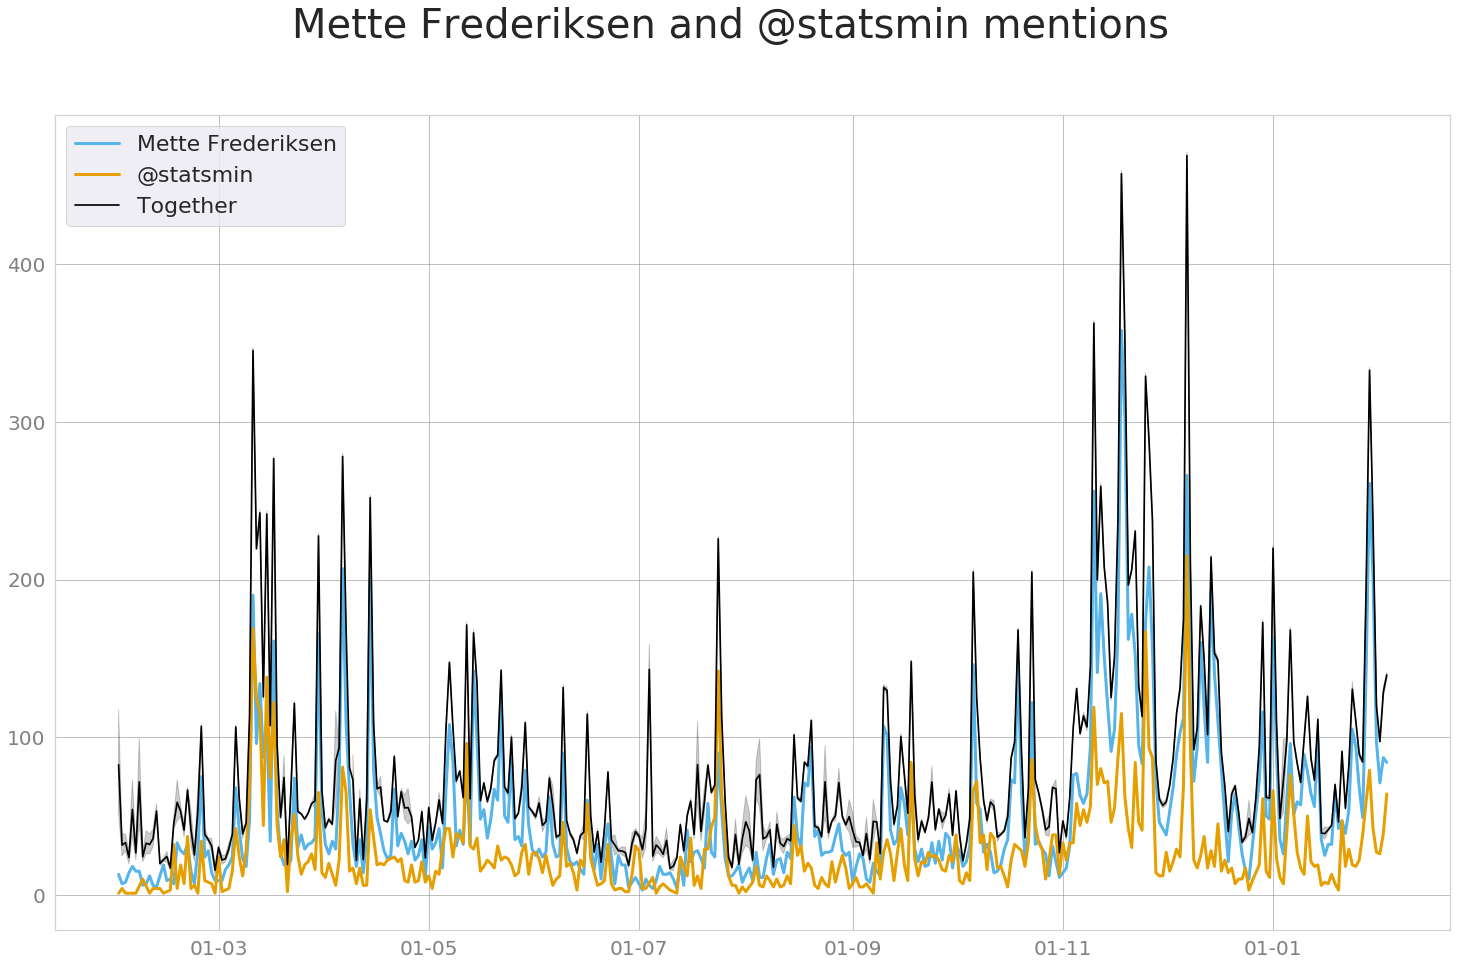

In [60]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

#nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, ax1 = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)
ax2 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[2], 
                   label = "Mette Frederiksen",
                     linewidth = 3, data = MF_freq_df)
ax2 = sns.lineplot(x="date", y="nr_of_tweets", 
                  color = palette[1], 
                   label = "@statsmin",
                     linewidth = 3, data = s_freq_df)
ax2 = sns.lineplot(x="date", y="total_7day_ave", 
                  color = palette[0], 
                   label = "Together",
                     linewidth = 1.7, data = freq_df)
#ax2 = sns.lineplot(x="month", y="nr_of_tweets", 
#                 # palette = palette, 
#                   label = "Monthly MF", markers = True,
#                     linewidth = 5, data = month_df)

#ax1 = sns.regplot(
#    data=freq_df,
#    x='date_ordinal',
#    y='nr_of_tweets',
#    color = palette[3],
#    ci=False
#    #y_jitter=.5
#)
ax2.set(xlabel="", ylabel = "")
ax2.xaxis.get_label().set_fontsize(40)
ax2.yaxis.get_label().set_fontsize(40)

ax2.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax2.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax2.xaxis.set_major_formatter(date_form)


    
fig.suptitle("Mette Frederiksen and @statsmin mentions", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/twitter_tweet_frequency.png"
fig.savefig(plot_name)

fig.show()

## They seem to correlate heavily - how heavily?

In [61]:
MF = pd.DataFrame(MF_freq_df["date"], MF_freq_df["nr_of_tweets"]).reset_index().rename(columns={"nr_of_tweets":"Mette Frederiksen"})
s = pd.DataFrame(s_freq_df["date"], s_freq_df["nr_of_tweets"]).reset_index().rename(columns={"nr_of_tweets":"@Statsmin"})

co_df = pd.merge(MF,s).drop_duplicates()

In [62]:
co_df

,Mette Frederiksen,date,@Statsmin
0,66,2020-06-29,15
15,66,2020-06-29,27
69,66,2020-06-29,26
95,66,2020-06-29,17
112,66,2020-06-29,22
...,...,...,...
23045188,266,2020-09-18,125
23045313,266,2020-09-18,116
23366874,121,2020-07-12,69
23383572,118,2020-07-12,69


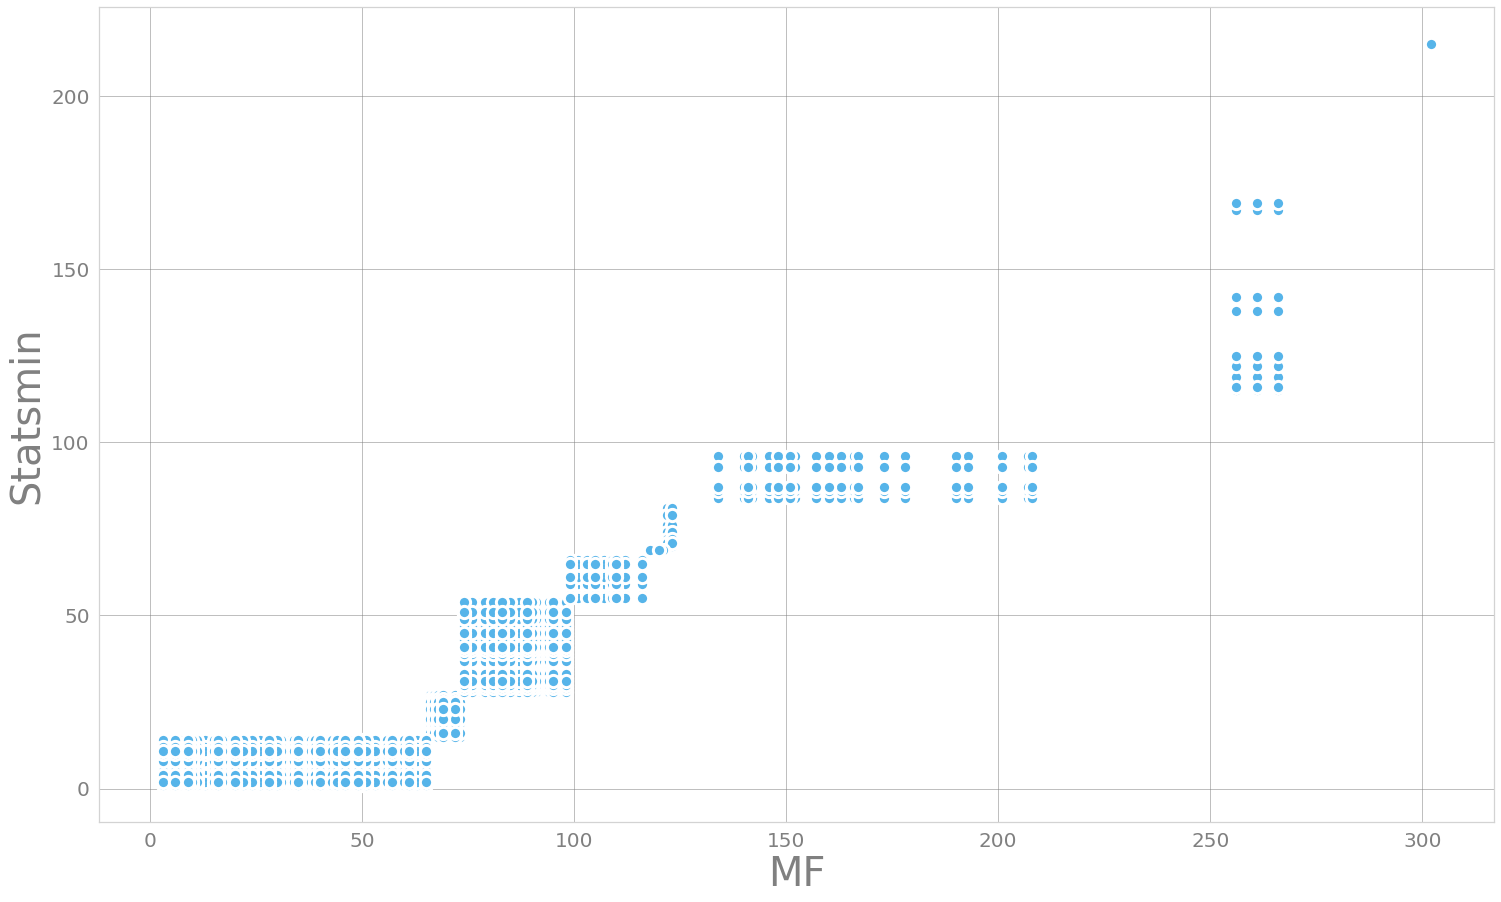

In [63]:
matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

#nr_colors = len(freq_df["date"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, ax1 = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)
ax2 = sns.scatterplot(x="Mette Frederiksen", y="@Statsmin", 
                  color = palette[2], s = 150, x_jitter = 0.5, y_jitter = 0.5,
                     linewidth = 3, data = co_df)


ax2.set(xlabel="MF", ylabel = "Statsmin")
ax2.xaxis.get_label().set_fontsize(40)
ax2.yaxis.get_label().set_fontsize(40)

ax2.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")


    
#fig.suptitle("Mette Frederiksen and @statsmin mentions", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

#plot_name = "fig/twitter_tweet_frequency.png"
#fig.savefig(plot_name)

fig.show()

/home/commando/maris/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


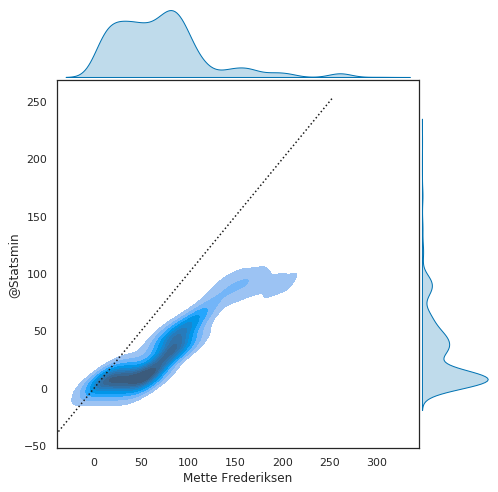

In [76]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import show
sns.set(style="white")

palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

g = sns.jointplot(co_df["Mette Frederiksen"], co_df["@Statsmin"], 
                  kind="kde", color = palette[5],
                  height=7, space=0,
                  fill=True)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')

plot_name = "fig/twitter_MF_against_statsmin.png"
fig.savefig(plot_name)

show()

## Hashtags

In [16]:
import re

def extract_hashtags(row):
    unique_hashtag_list = list(re.findall(r'#\S*\w', row["text"]))
    return unique_hashtag_list

def hashtag_per_row(data):
    # Create hashtags column with the actual unique hashtags
    data["hashtags"] = data.apply(lambda row: extract_hashtags(row), axis = 1)

    # Let's take a subset of necessary columns, add id
    df = data[["date", "hashtags"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Hashtag per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['date','id'])['hashtags']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'hashtag'}))
    #lowercase!
    df["hashtag"] = df["hashtag"].str.lower()
    df["hashtag"] = df["hashtag"].str.replace("'.", "")
    df["hashtag"] = df["hashtag"].str.replace("’.", "")

    return df
# Just MF
hashtags = hashtag_per_row(MF_freq_df)

In [17]:
# Aggregate a frequency DF
def get_hashtag_frequencies(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'nr_of_hashtags' : df.groupby(['hashtag']).size()}).reset_index()
    return tweet_freq

In [18]:
freq_hashtags = get_hashtag_frequencies(hashtags)
dff = freq_hashtags.sort_values(by=['nr_of_hashtags'], ascending=False)

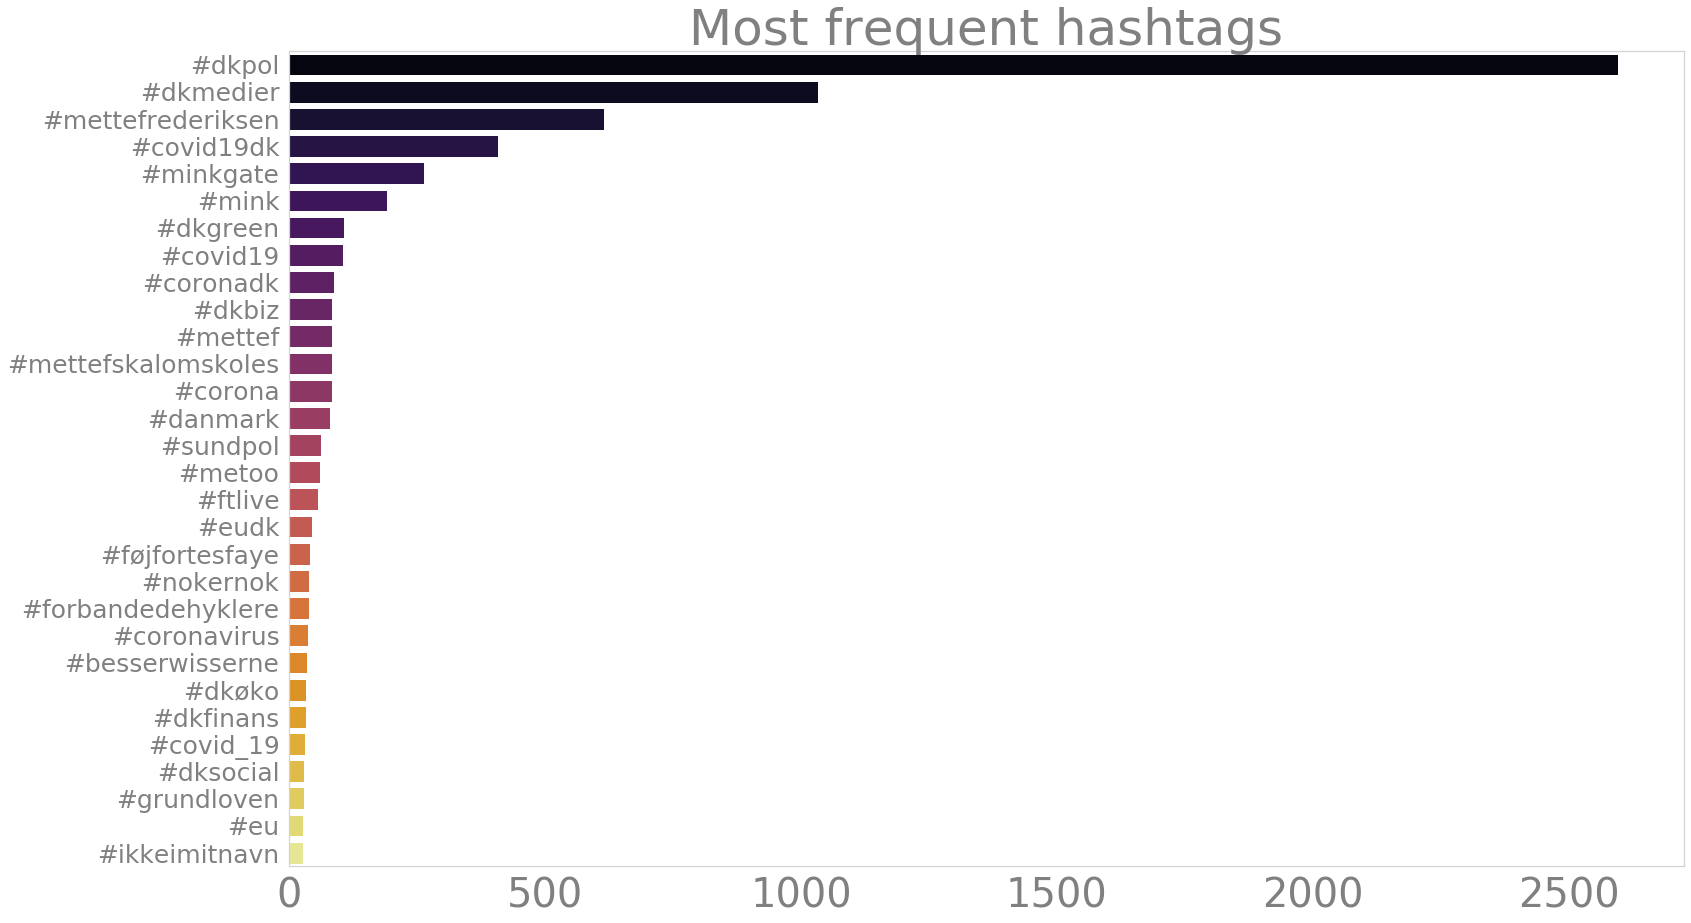

In [19]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)

df0 = dff.nlargest(30, columns=['nr_of_hashtags'])
nr_hash = len(df0["hashtag"].unique())
themes.theme_minimal(grid=False, ticks=False, fontsize=40)

a4_dims = (25,15) #(11.7, 8.27)
fig, (ax) = plt.subplots(1,1, figsize=a4_dims)

palette = sns.color_palette("inferno", nr_hash)

ax = sns.barplot(y="hashtag", x="nr_of_hashtags", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent hashtags",fontsize=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=25)

ax.set(xlabel="", ylabel = "")
ax.xaxis.get_label().set_fontsize(100)
ax.yaxis.get_label().set_fontsize(40)

ax.grid(color='white', linestyle='-', linewidth=0.5, which= "both")

plot_name = "fig/twitter_frequent_hashtags.png"
fig.savefig(plot_name)

In [20]:
per_date = hashtags[['date', 'id', 'hashtag']].groupby(['date', 'hashtag']).agg(['count']).reset_index()
per_date["hashtag_per_date"] = per_date["id"]["count"]
per_date = per_date[["date", "hashtag", "hashtag_per_date"]]
per_date_hash = per_date.rename(columns={"hashtag": "Hashtag"})

## Sentiment analysis

In [21]:
MF_df["date"] = pd.to_datetime(MF_df["date"])

# Rolling average
MF_df['compound_7day_ave'] = MF_df.compound.rolling(7).mean().shift(-3)

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


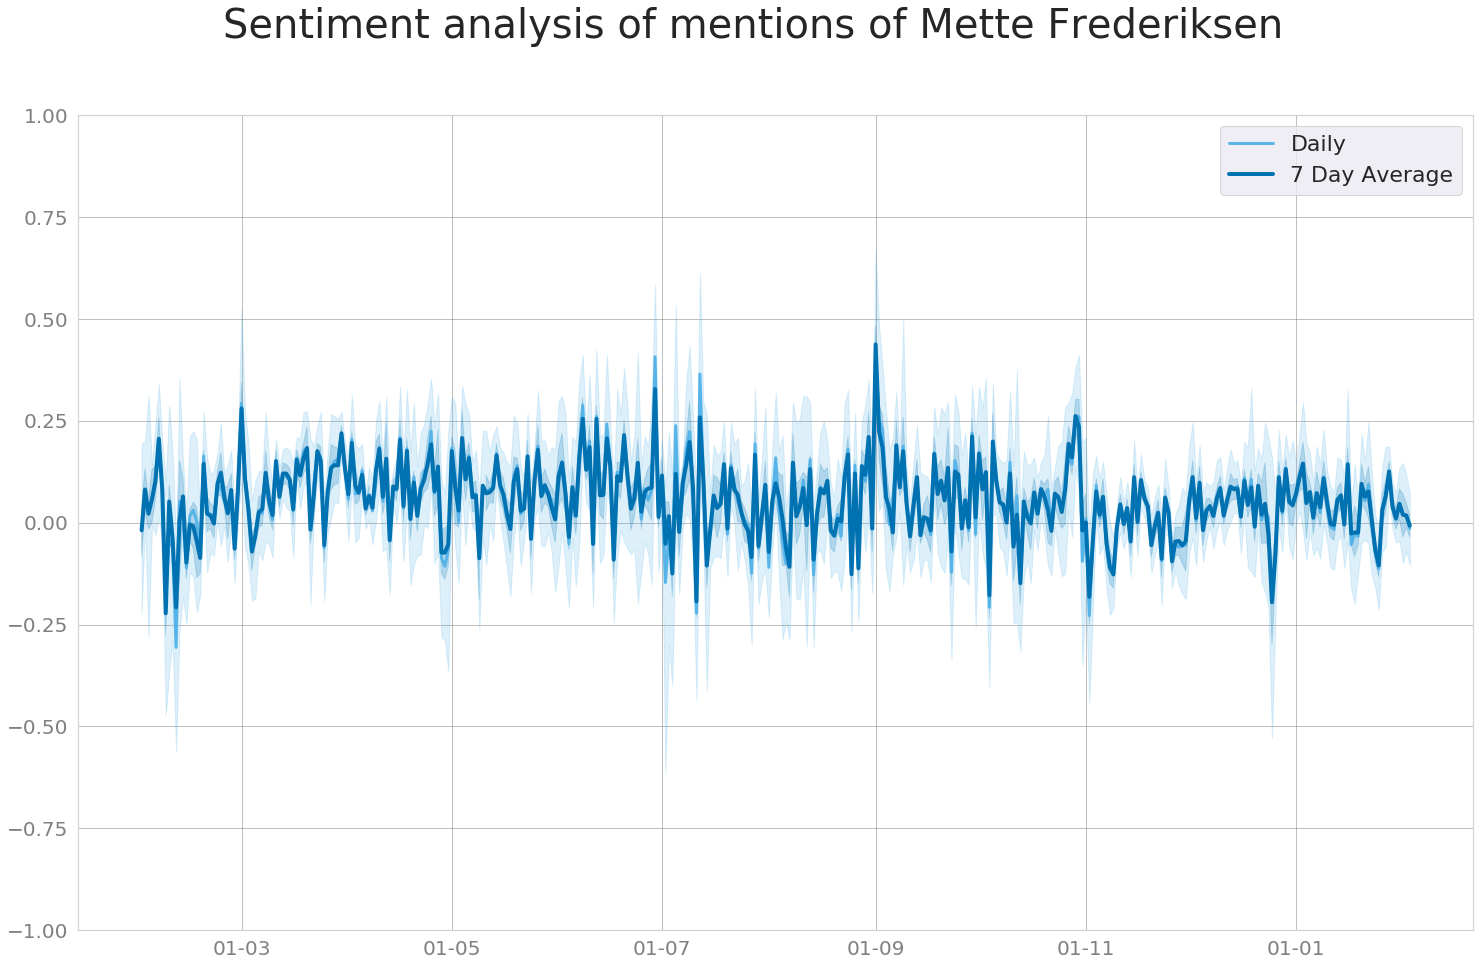

In [22]:
import datetime

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="date", y="compound", 
                   label="Daily", color = palette[2],
                     linewidth = 3, data = MF_df)

ax1 = sns.lineplot(x="date", y="compound_7day_ave", 
                   label="7 Day Average", color = palette[5],
                     linewidth = 4, data = MF_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Sentiment analysis of mentions of Mette Frederiksen", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(-1, 1))

plot_name = "fig/twitter_sentiment_compound.png"
fig.savefig(plot_name)

fig.show()

In [23]:
def get_monthly_compound(df):
    # Add freq of hashtags by themselves in the dataset
    tweet_freq = pd.DataFrame({'mean_compound' : df.groupby(['month']).mean('compound')}).reset_index()

    # Add the whole_frew to id_hashtag
    freq_hashtags = pd.merge(df, tweet_freq, how='left', on=['month'])#, 'id', 'created_at'])
    
    df0 = freq_hashtags
    return df0

MF_df["month"] = pd.to_datetime(MF_df["created_at"], utc=True).dt.strftime('%Y-%m')
month_df = get_tweet_frequencies(MF_df)
month_df["month"] = pd.to_datetime(month_df["month"])

# Rolling average
month_df['compound_7day_ave'] = month_df.compound.rolling(7).mean().shift(-3)

/home/commando/maris/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [24]:
month_df = month_df[["compound", "month"]]

In [25]:
monthly= month_df.resample("M", on = "month").mean().reset_index()
monthly["month"] = pd.to_datetime(monthly["month"])

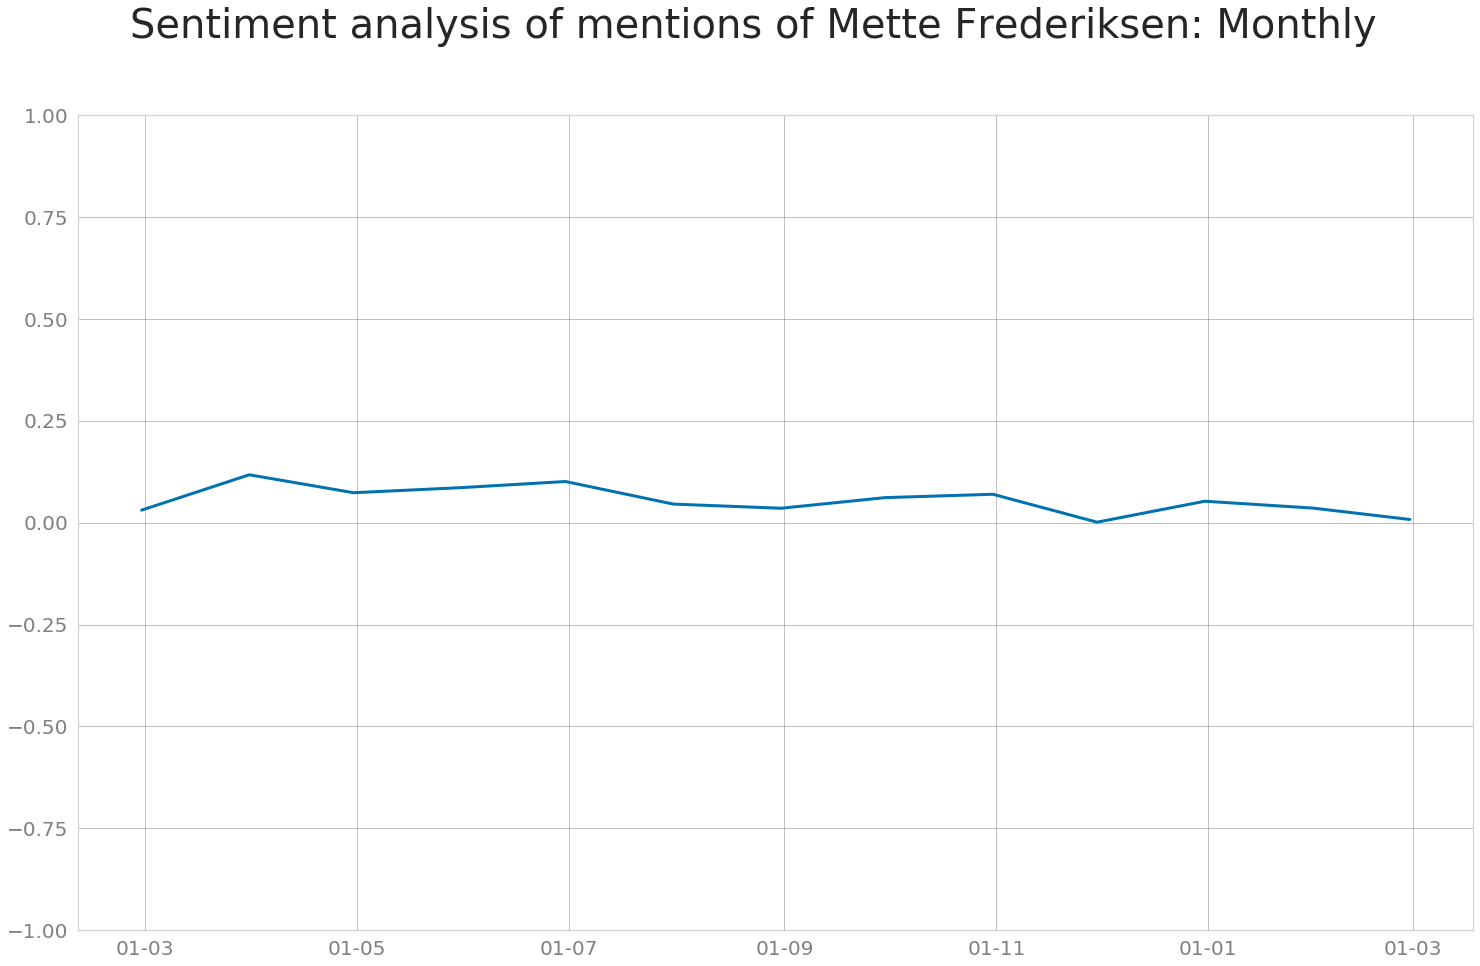

In [26]:
import datetime

matplotlib.rc('ytick', labelsize=20)
matplotlib.rc('xtick', labelsize=20)


themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, (ax1) = plt.subplots(1,1, figsize=a4_dims)
sns.set(font_scale = 2)
ax1 = sns.lineplot(x="month", y="compound", 
                   color = palette[5],
                     linewidth = 3, data = monthly)

#ax1 = sns.lineplot(x="date", y="compound_7day_ave", 
#                   label="7 Day Average", color = palette[5],
#                     linewidth = 4, data = month_df)


ax1.set(xlabel="", ylabel = "")
ax1.xaxis.get_label().set_fontsize(40)
ax1.yaxis.get_label().set_fontsize(40)

ax1.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

# Define the date format
ax1.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax1.xaxis.set_major_formatter(date_form)

    
fig.suptitle("Sentiment analysis of mentions of Mette Frederiksen: Monthly", size = "40")
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()
ax1.set(ylim=(-1, 1))

plot_name = "fig/twitter_sentiment_compound_monthly.png"
fig.savefig(plot_name)

fig.show()

## Word frequency

In [27]:
import spacy
import string
from string import digits
import nltk

sp = spacy.load('da_core_news_lg')

file = open("../hope-b117/stop_words.txt","r+")
stop_words = file.read().split()

# Lemmatize stop words
stops = " ".join(stop_words)
stops = sp(stops)
my_stop_words = [t.lemma_ for t in stops]

In [28]:
def lemmas(row):
    tweet = row["mentioneless_text"].lower()
    tweet = tweet.translate(str.maketrans('', '', string.punctuation))
    tweet = tweet.replace('”', '')
    tweet = tweet.replace('“', '')
    tweet = tweet.replace('»', '')
    tweet = tweet.replace('…','')
    
    sentence = sp(tweet)
    
    lemmas = []
    for word in sentence:
        lemmas.append(word.lemma_)
    
    res = [x for x in lemmas if x not in my_stop_words]
    hmm = ['    ','   ','  ',' ','', '🇩','🇰', '♂', '🤷']
    res = [x for x in res if x not in hmm]
    return res

MF_freq_df["tokens_list"] = freq_df.apply(lambda row: lemmas(row), axis = 1)

In [29]:
def join_tokens(row):
    res = " ".join(row["tokens_list"])
    return res

MF_freq_df["tokens_string"] = MF_freq_df.apply(lambda row: join_tokens(row), axis = 1)
texts = MF_freq_df["tokens_string"]

In [30]:
import string

texts = ", ".join(texts)
texts = texts.translate(str.maketrans('', '', string.punctuation))
texts = texts.lower()

In [31]:
word_freq = MF_freq_df.tokens_string.str.split(expand=True).stack().value_counts()

In [32]:
word_freq = word_freq.to_frame().reset_index().rename(columns={"index": "word", 0: "Frequency"})

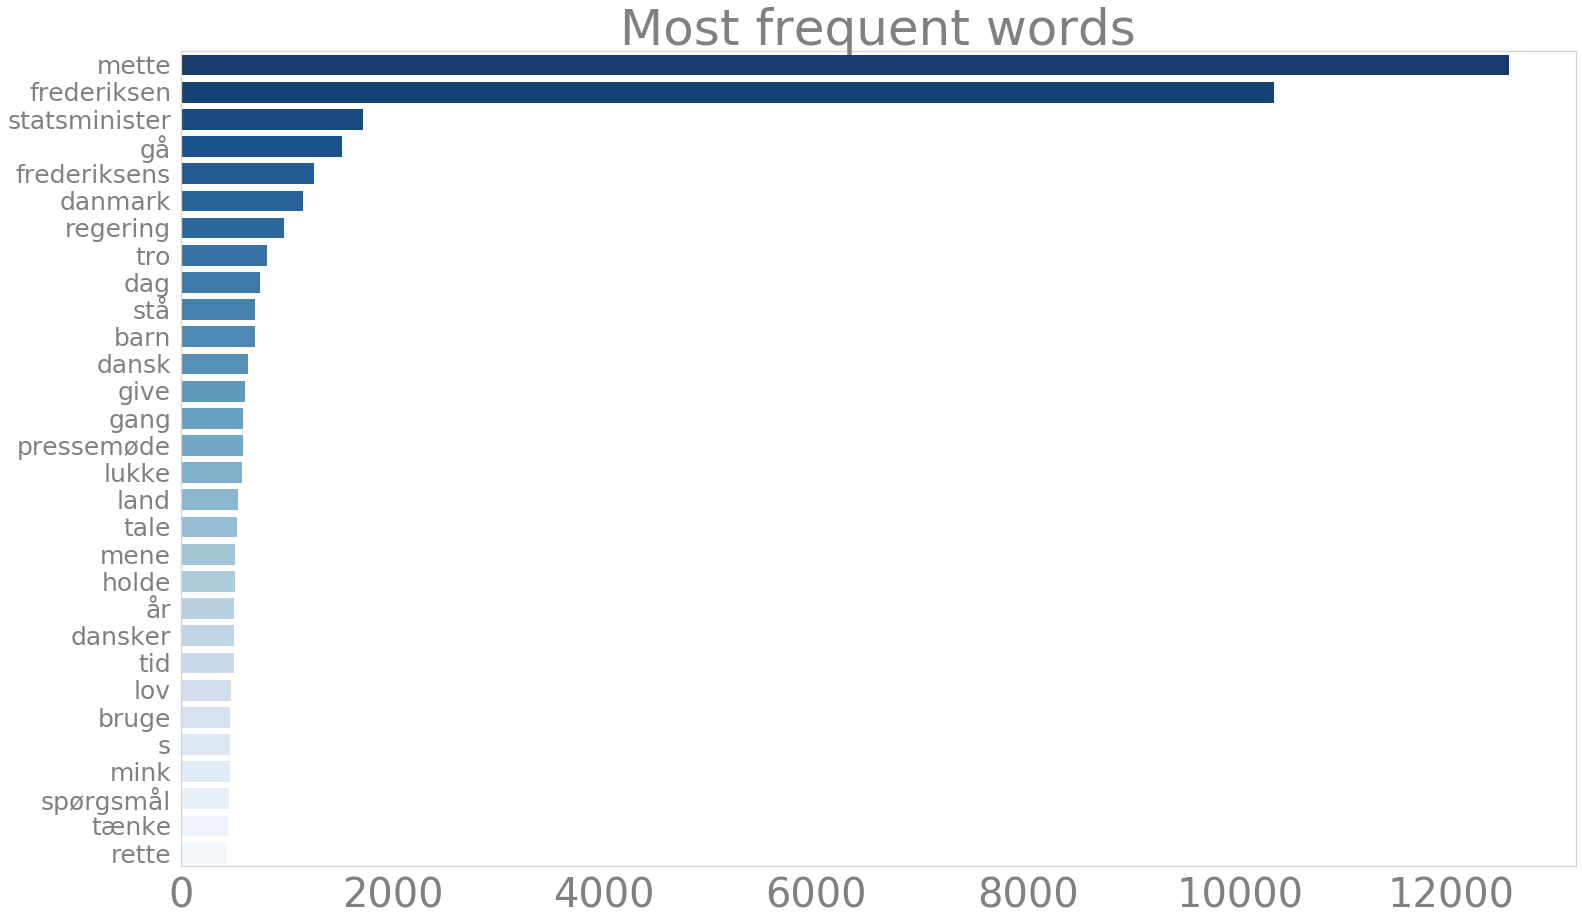

In [33]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import pyplot_themes as themes

file = open("../hope-b117/stop_words.txt","r+")
stop_words = file.read().split()

word_freq = word_freq[~word_freq["word"].isin(stop_words)]
df0 = word_freq.nlargest(30, columns=['Frequency'])
nr_hash = len(df0["word"].unique())

matplotlib.rc('ytick', labelsize=30)
matplotlib.rc('xtick', labelsize=30)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

fig, (ax) = plt.subplots(1,1, figsize=a4_dims)

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
palette = sns.color_palette("Blues_r", nr_hash)

ax = sns.barplot(y="word", x="Frequency", palette = palette, data = df0)

ax.set(xlabel="Count", ylabel = "Hashtag")
ax.xaxis.get_label().set_fontsize(25)
ax.yaxis.get_label().set_fontsize(25)
ax.axes.set_title("Most frequent words",fontsize=50)

plt.xticks(fontsize=40)
plt.yticks(fontsize=25)

ax.set(xlabel="", ylabel = "")
ax.xaxis.get_label().set_fontsize(100)
ax.yaxis.get_label().set_fontsize(40)

plot_name = "fig/twitter_word_frequency.png"
fig.savefig(plot_name)

In [34]:
def tokens_per_row(data):
    # Let's take a subset of necessary columns, add id
    df = data[["date", "tokens_list"]].reset_index().rename(columns={"index": "id"})

    # Select only the ones where we have more than 1 hashtag per tweet
    #df = df[df["hashtags"].map(len) > 1].reset_index(drop=True)

    # Token per row
    # convert list of pd.Series then stack it
    df = (df
     .set_index(['date','id'])['tokens_list']
     .apply(pd.Series)
     .stack()
     .reset_index()
     .drop('level_2', axis=1)
     .rename(columns={0:'token'}))
    #lowercase!
    #df["token"] = df["token"].str.lower()
    #df["token"] = df["token"].str.replace("'.", "")
    #df["token"] = df["token"].str.replace("’.", "")

    return df

token_df = tokens_per_row(MF_freq_df)
token_df.head()

,date,id,token
0,2020-04-08,0,mette
1,2020-04-08,0,frederiksen
2,2020-04-08,0,forsikre
3,2020-04-08,0,varsle
4,2020-04-08,0,genåbning


In [35]:
per_date = token_df[['date', 'id', 'token']].groupby(['date', 'token']).agg(['count']).reset_index()
per_date["token_per_date"] = per_date["id"]["count"]
per_date = per_date[["date", "token", "token_per_date"]]
per_date_token = per_date.rename(columns={"token": "Token"})

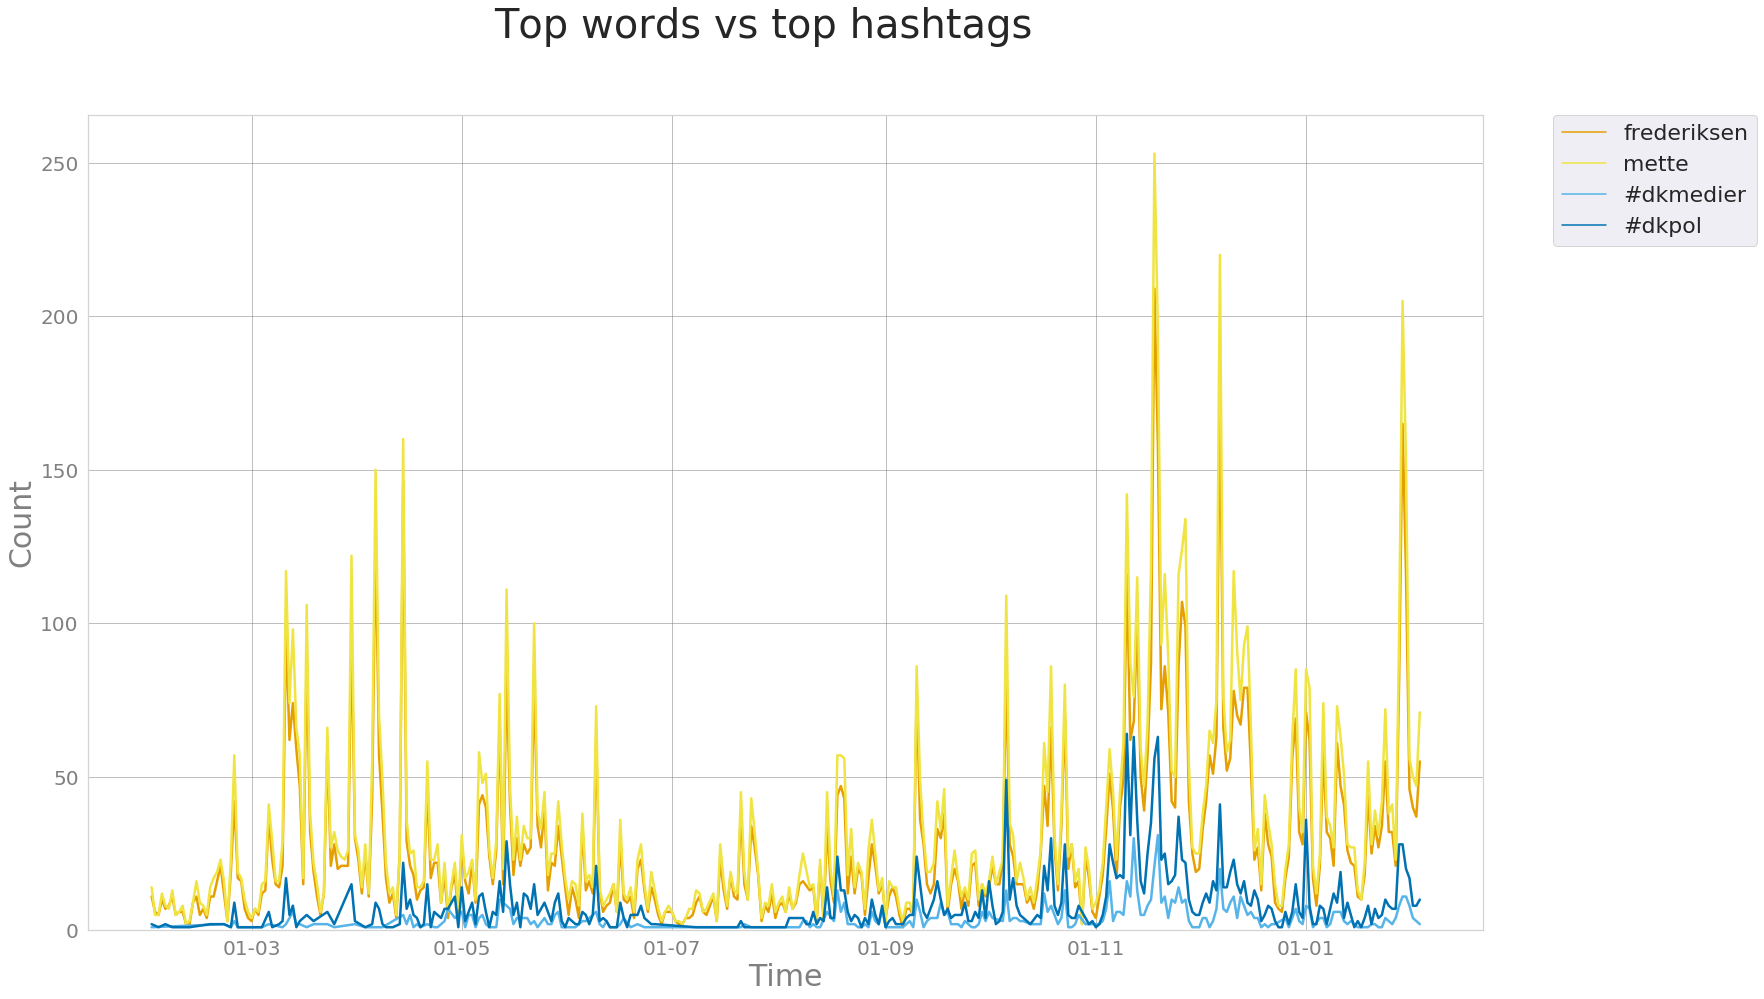

In [36]:
df_token = per_date_token.loc[per_date_token['Token'].isin(df0["word"][0:2])]
df_hash = per_date_hash.loc[per_date_hash['Hashtag'].isin(dff["hashtag"][0:2])]

#nr_hash = len(df1["Token"].unique())

themes.theme_minimal(grid=False, ticks=False, fontsize=18)
a4_dims = (25,15) #(11.7, 8.27)

#palette = sns.color_palette("inferno", nr_hash)
palette = ["#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

fig, ax = plt.subplots(figsize=a4_dims)
sns.set(font_scale = 2)

ax = sns.lineplot(x="date", y="token_per_date", 
                  hue="Token", style="Token", 
                  markers = False, markersize = 10, 
                  dashes = False, 
                  palette = [palette[0], palette[3]], 
                  linewidth = 2.5, data = df_token)

ax = sns.lineplot(x="date", y="hashtag_per_date", 
                  hue="Hashtag", style="Hashtag", 
                  markers = False, markersize = 10, 
                  dashes = False, 
                  palette = [palette[1], palette[4]], 
                  linewidth = 2.5, data = df_hash)

ax.set(xlabel="Time", ylabel = "Count")
ax.xaxis.get_label().set_fontsize(30)
ax.yaxis.get_label().set_fontsize(30)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

ax.grid(color='grey', linestyle='-', linewidth=0.5, which= "both")

#plt.ylim(0, 80)

# Define the date format
ax.xaxis_date()
date_form = mdates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(date_form)

ax.set(ylim=(0, None))
fig.suptitle('Top words vs top hashtags', fontsize=40)
#ax1.set_title('Level 1', fontsize=30)

#ax1.legend_.remove()

plot_name = "fig/twitter_words_vs_hashtags_over_time.png"
fig.savefig(plot_name)

fig.show()

## Word cloud

In [37]:
# Import packages
import matplotlib.pyplot as plt
%matplotlib inline
# Define a function to plot word cloud
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(40, 30))
    # Display image
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");
    plot_name = "fig/twitter_word_cloud.png"
    plt.savefig(plot_name)

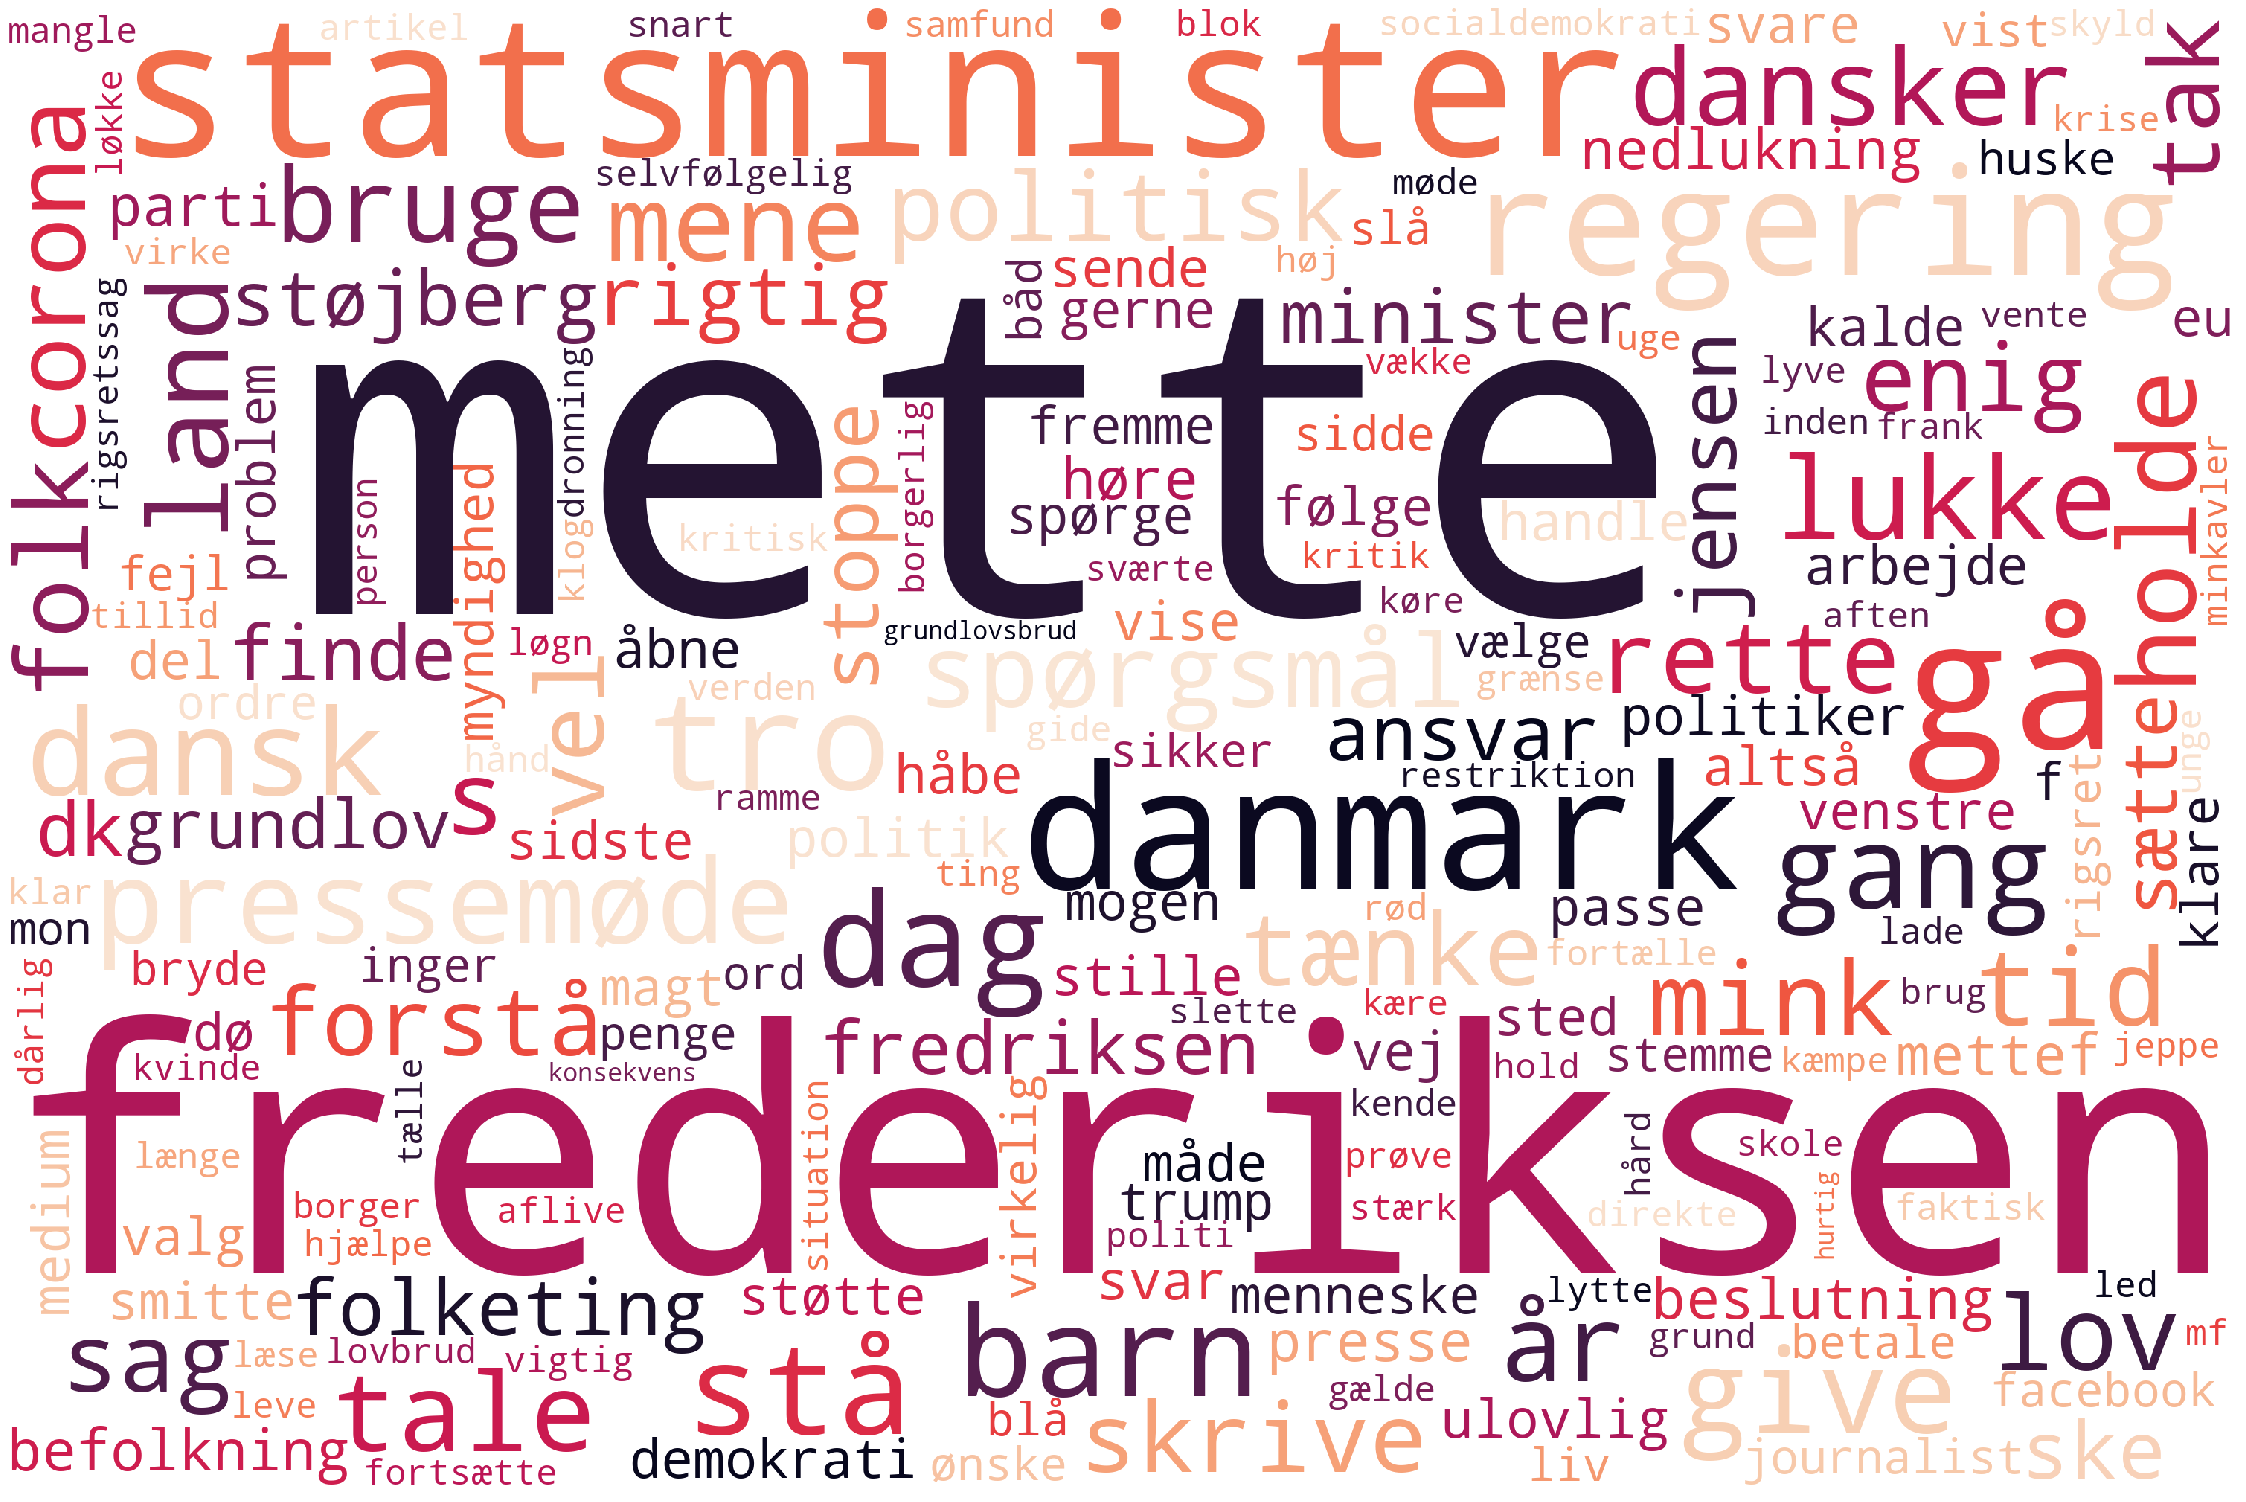

In [38]:
# Import package
from wordcloud import WordCloud, STOPWORDS
# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, 
                      background_color='white', colormap="rocket", 
                      collocations=False, stopwords = stop_words).generate(texts)
# Plot
plot_cloud(wordcloud)

## Co-occurrence

In [39]:
from nltk import bigrams
import itertools
import collections
import networkx as nx
import spacy
import nltk

In [40]:
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

#nlp = spacy.load("da_core_news_sm")

%matplotlib inline

In [41]:
# Create list of lists containing bigrams in tweets
#terms_bigram = list(bigrams(wordlist))
terms_bigram = [list(bigrams(tweet)) for tweet in MF_freq_df['tokens_list']]
#terms_bigram = [list(bigrams(tweet)) for tweet in df['tokens_no_stop']]

# View bigrams for the first tweet
terms_bigram[0]

[('mette', 'frederiksen'),
 ('frederiksen', 'forsikre'),
 ('forsikre', 'varsle'),
 ('varsle', 'genåbning'),
 ('genåbning', 'upolitisk'),
 ('upolitisk', 'undre'),
 ('undre', 'ekspert')]

In [42]:
# Flatten list of bigrams in clean tweets
bigrams = list(itertools.chain(*terms_bigram))

# Create counter of words in clean bigrams
bigram_counts = collections.Counter(bigrams)

In [43]:
bigram_df = pd.DataFrame(bigram_counts.most_common(30), columns=["bigram", "count"])

In [44]:
len(bigram_counts)

133714

In [45]:
bigram_df.head(30)

,bigram,count
0,"(mette, frederiksen)",10264
1,"(mette, frederiksens)",1253
2,"(statsminister, mette)",730
3,"(mette, fredriksen)",315
4,"(mogens, jensen)",195
5,"(frederiksen, gå)",166
6,"(inger, støjberg)",163
7,"(mette, f)",158
8,"(tro, mette)",118
9,"(frederiksen, s)",117


In [46]:
bigram_df = bigram_df.drop([17, 27, 28, 29]).reset_index(drop=True)

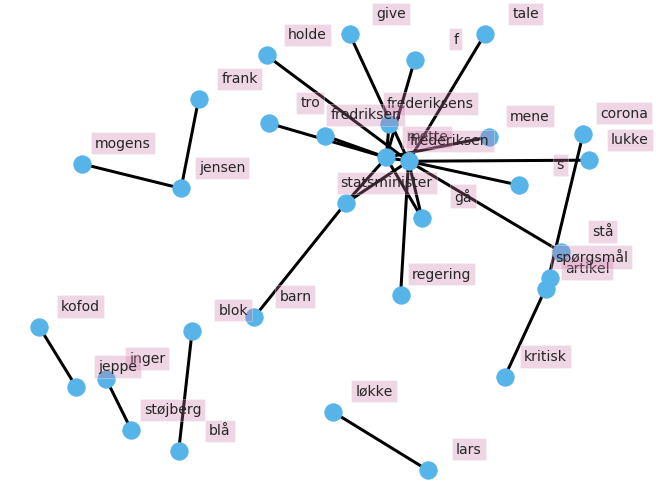

In [47]:
palette = ["#000000", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7"]

# Create dictionary of bigrams and their counts
d = bigram_df.set_index("bigram").T.to_dict("records")
# Create network plot 
G = nx.Graph()

# Create connections between nodes
for k, v in d[0].items():
    G.add_edge(k[0], k[1], weight=(v * 5))

fig, ax = plt.subplots(figsize=(11, 9))

pos = nx.spring_layout(G, k=5)

# Plot networks
nx.draw_networkx(G, pos,
                 font_size=10,
                 width=3,
                 edge_color= palette[0], #'red',
                 node_color= palette[2], #'green',
                 with_labels = False,
                 ax=ax)

# Create offset labels
for key, value in pos.items():
    x, y = value[0]+.135, value[1]+.065
    ax.text(x, y,
            s=key,
            bbox=dict(facecolor= palette[7], #'red', 
                      alpha=0.3), ## 0.5),
            horizontalalignment='center', fontsize=14)
    

fig.patch.set_visible(False)
ax.axis('off')

plt.savefig("fig/twitter_bigram_graph.png", dpi=150)

plt.show()

## Try more methods